In [54]:
# EJECUTA ESTO PRIMERO en tu notebook
%load_ext kedro.ipython

# Esto automáticamente configurará todo y creará:
# - context, session, catalog, pipelines
print("✅ Kedro extension loaded!")

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython
✅ Kedro extension loaded!


In [55]:
print("Datasets disponibles en el catálogo:")
catalog.keys()



Datasets disponibles en el catálogo:



[
    'animal_charity_donation_records',
    'aac_intakes_outcomes',
    'cleaned_dog_breed',
    'cleaned_charity_donations_notebook',
    'parameters',
    'params:data_engineering',
    'params:data_engineering.imputation_strategy',
    'params:data_engineering.imputation_strategy.numerical',
    'params:data_engineering.imputation_strategy.categorical',
    'params:data_engineering.scaling',
    'params:data_engineering.scaling.standard_scaler',
    'params:data_engineering.scaling.robust_scaler',
    'params:data_engineering.outlier_limits',
    'params:data_engineering.outlier_limits.lower_percentile',
    'params:data_engineering.outlier_limits.upper_percentile',
    'params:data_engineering.outlier_limits.iqr_multiplier',
    'params:data_engineering.encode_columns',
    'synthetic_dog_breed_health_data'
]

In [56]:

df_dog_breed = catalog.load("synthetic_dog_breed_health_data")




print(f" df_dog_breed: {df_dog_breed.shape}")



[09/14/25 02:12:14] INFO     Loading data from synthetic_dog_breed_health_data (CSVDataset)... ]8;id=554172;file://C:\Users\alvaro\Documents\GitHub\MachineLearning\Proyecto_ML_1\.venv\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=835393;file://C:\Users\alvaro\Documents\GitHub\MachineLearning\Proyecto_ML_1\.venv\lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

 df_dog_breed: (10000, 21)


In [57]:
df_dog_breed.head()

,ID,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,...,Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic,Healthy
0,1,Australian Shepherd,Medium,Male,3.0,60.0,Neutered,NaN,NaN,Wellness,...,No,Yes,No,12.0,1.0,Active,1.0,30.0,Yes,Yes
1,2,Dachshund,NaN,Female,4.0,57.0,Neutered,Very Active,Home cooked,Special,...,Yes,No,No,11.0,3.0,NaN,0.0,47.0,Yes,NaN
2,3,Chihuahua,Small,Female,12.0,67.0,Neutered,Active,Home cooked,Special,...,Yes,No,No,10.0,1.0,Low,0.0,92.0,Yes,Yes
3,4,Siberian Husky,Medium,Male,13.0,35.0,NaN,Very Active,NaN,Special,...,No,No,No,12.0,NaN,NaN,1.0,75.0,Yes,Yes
4,5,Boxer,Medium,Male,13.0,35.0,NaN,Very Active,Wet food,Purina,...,Yes,Yes,No,9.0,1.0,NaN,0.0,64.0,Yes,No


In [58]:
df_dog_breed.columns.tolist()


[
    'ID',
    'Breed',
    'Breed Size',
    'Sex',
    'Age',
    'Weight (lbs)',
    'Spay/Neuter Status',
    'Daily Activity Level',
    'Diet',
    'Food Brand',
    'Daily Walk Distance (miles)',
    'Other Pets in Household',
    'Medications',
    'Seizures',
    'Hours of Sleep',
    'Play Time (hrs)',
    'Owner Activity Level',
    'Annual Vet Visits',
    'Average Temperature (F)',
    'Synthetic',
    'Healthy'
]

In [59]:
# Información general del dataset
df_dog_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  int64  
 1   Breed                        9710 non-null   object 
 2   Breed Size                   9712 non-null   object 
 3   Sex                          9675 non-null   object 
 4   Age                          9709 non-null   float64
 5   Weight (lbs)                 9709 non-null   float64
 6   Spay/Neuter Status           6433 non-null   object 
 7   Daily Activity Level         7770 non-null   object 
 8   Diet                         9698 non-null   object 
 9   Food Brand                   9700 non-null   object 
 10  Daily Walk Distance (miles)  9706 non-null   float64
 11  Other Pets in Household      9702 non-null   object 
 12  Medications                  9751 non-null   object 
 13  Seizures         

📋 INFORMACIÓN DEL DATASET:
 10.000 registros de perros con características físicas, hábitos y salud.
 21 columnas incluyendo edad, peso, raza, tamaño, actividad, dieta, visitas al veterinario y estado de salud.
 Variables clave para la hipótesis: Edad, Peso, Breed Size, Spay/Neuter Status, Daily y Owner Activity Level, Play Time, Walk Distance, Annual Vet Visits, Healthy.


In [60]:
# Estadísticas descriptivas para columnas numéricas
df_dog_breed.describe()

,ID,Age,Weight (lbs),Daily Walk Distance (miles),Hours of Sleep,Play Time (hrs),Annual Vet Visits,Average Temperature (F)
count,10000.00000,9709.000000,9709.000000,9706.000000,9721.000000,9691.000000,9694.000000,9655.000000
mean,5000.50000,7.063858,50.202493,2.527818,11.006995,1.524095,1.474727,64.559606
std,2886.89568,3.751616,14.900010,1.458157,1.463321,0.979939,1.152881,14.824669
min,1.00000,1.000000,10.000000,0.000000,8.000000,0.000000,0.000000,30.000000
25%,2500.75000,4.000000,40.000000,1.250000,10.000000,1.000000,1.000000,54.000000
50%,5000.50000,7.000000,50.000000,3.000000,11.000000,2.000000,1.000000,64.000000
75%,7500.25000,10.000000,60.000000,3.000000,12.000000,2.000000,2.000000,75.000000
max,10000.00000,13.000000,109.000000,8.000000,14.000000,4.000000,4.000000,100.000000


In [61]:
import pandas as pd
import numpy as np

# Análisis de valores missing por columna
missing_analysis = df_dog_breed.isnull().sum()
missing_percentage = (missing_analysis / len(df_dog_breed)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_analysis,
    'Missing_Percentage': missing_percentage
})
missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

,Missing_Count,Missing_Percentage
Spay/Neuter Status,3567,35.67
Daily Activity Level,2230,22.30
Owner Activity Level,2227,22.27
Average Temperature (F),345,3.45
Sex,325,3.25
Healthy,322,3.22
Synthetic,310,3.10
Play Time (hrs),309,3.09
Annual Vet Visits,306,3.06
Diet,302,3.02


🔎 MISSING VALUES:
 Las columnas con más missing son Spay/Neuter Status (35.7%), Daily Activity Level (22.3%) y Owner Activity Level (22.3%).  
 El resto de las columnas tiene menos del 5% de valores faltantes, por lo que el dataset está mayormente completo.


In [62]:
# Análisis de variables categóricas con missing values
categorical_with_missing = ['Spay/Neuter Status', 'Daily Activity Level', 'Owner Activity Level']
for col in categorical_with_missing:
    print(f"\n{col}:")
    print(f"Valores únicos: {df_dog_breed[col].unique()}")
    print(f"Distribución:")
    print(df_dog_breed[col].value_counts(dropna=False))


Spay/Neuter Status:
Valores únicos: ['Neutered' nan 'Spayed']
Distribución:
Spay/Neuter Status
NaN         3567
Spayed      3222
Neutered    3211
Name: count, dtype: int64

Daily Activity Level:
Valores únicos: [nan 'Very Active' 'Active' 'Moderate' 'Low']
Distribución:
Daily Activity Level
NaN            2230
Active         1961
Low            1952
Moderate       1939
Very Active    1918
Name: count, dtype: int64

Owner Activity Level:
Valores únicos: ['Active' nan 'Low' 'Moderate' 'Very Active']
Distribución:
Owner Activity Level
NaN            2227
Very Active    1993
Active         1959
Moderate       1920
Low            1901
Name: count, dtype: int64


🎯 VARIABLES CATEGÓRICAS:

 Spay/Neuter Status está casi balanceado entre Spayed y Neutered, pero tiene muchos missing (3567).  
 Daily Activity Level y Owner Activity Level muestran distribución relativamente pareja entre categorías, aunque también presentan bastante missing.  
 Esta información puede ser útil para hipótesis sobre actividad y salud del perro, pero habrá que imputar o manejar los valores faltantes.


In [63]:
# Análisis de la variable objetivo 'Healthy'
if 'Healthy' in df_dog_breed.columns:
    healthy_distribution = df_dog_breed['Healthy'].value_counts(dropna=False)
    print("Distribución de Healthy:")
    print(healthy_distribution)
    print(f"\nPorcentaje de missing: {(df_dog_breed['Healthy'].isnull().sum() / len(df_dog_breed)) * 100:.2f}%")

Distribución de Healthy:
Healthy
Yes    7178
No     2500
NaN     322
Name: count, dtype: int64

Porcentaje de missing: 3.22%


💵 DONACIONES PROMEDIO POR PAÍS / Healthy:
 La mayoría de los perros son saludables (Yes: 7178), con un 3.22% de missing.  
 Esta variable será clave para hipótesis relacionadas con edad, actividad y cuidados veterinarios.


In [64]:
# Análisis de distribuciones de variables categóricas clave
key_categorical = ['Breed Size', 'Sex', 'Diet', 'Other Pets in Household', 'Medications', 'Seizures']
for col in key_categorical:
    print(f"\n{col}:")
    print(df_dog_breed[col].value_counts(dropna=False))
    print(f"Missing: {df_dog_breed[col].isnull().sum()}")


Breed Size:
Breed Size
Large     3824
Small     3232
Medium    2656
NaN        288
Name: count, dtype: int64
Missing: 288

Sex:
Sex
Male      4890
Female    4785
NaN        325
Name: count, dtype: int64
Missing: 325

Diet:
Diet
Wet food        2501
Home cooked     2475
Hard food       2390
Special diet    2332
NaN              302
Name: count, dtype: int64
Missing: 302

Other Pets in Household:
Other Pets in Household
No     4922
Yes    4780
NaN     298
Name: count, dtype: int64
Missing: 298

Medications:
Medications
No     4938
Yes    4813
NaN     249
Name: count, dtype: int64
Missing: 249

Seizures:
Seizures
No     9214
Yes     485
NaN     301
Name: count, dtype: int64
Missing: 301


🎯 VARIABLES CATEGÓRICAS:
Breed Size: la mayoría son perros grandes o pequeños, missing bajo (288).  
Sex: balanceado entre machos y hembras, pocos missing (325).  
Diet: distribución similar entre tipos de comida, missing bajo (302).  
Other Pets in Household: casi mitad con otros mascotas, missing bajo (298).  
Medications: balance entre sí/no, missing bajo (249).  
Seizures: mayoría sin convulsiones, pocos casos y missing (301).  
Esta información ayuda a relacionar salud, actividad y necesidades nutricionales.


In [65]:
# Análisis de relación entre actividad del dueño y actividad del perro
activity_cross = pd.crosstab(df_dog_breed['Daily Activity Level'], df_dog_breed['Owner Activity Level'], margins=True)
activity_cross

Owner Activity Level,Active,Low,Moderate,Very Active,All
Daily Activity Level,,,,,
Active,384,355,400,412,1551
Low,385,380,369,360,1494
Moderate,392,391,357,387,1527
Very Active,358,363,357,397,1475
All,1519,1489,1483,1556,6047


🎯 ACTIVIDAD PROPIETARIO VS PERRO:
Se observa que la actividad del propietario y la del perro no siempre coinciden; por ejemplo, dueños “Active” tienen perros en todas las categorías.  
Esto es útil para la hipótesis porque indica que la salud del perro podría depender tanto de la actividad propia del animal como del estilo de vida del dueño.


In [66]:
# Análisis de salud por raza (primeras 10 razas más comunes)
top_breeds = df_dog_breed['Breed'].value_counts().head(10).index
health_by_breed = df_dog_breed[df_dog_breed['Breed'].isin(top_breeds)].groupby('Breed')['Healthy'].value_counts(normalize=True).unstack()
health_by_breed

Healthy,No,Yes
Breed,,
Australian Shepherd,0.250000,0.750000
Beagle,0.260542,0.739458
Boxer,0.275862,0.724138
Bulldog,0.267964,0.732036
Chihuahua,0.280952,0.719048
Dachshund,0.244548,0.755452
Doberman,0.253226,0.746774
Golden Retriever,0.267606,0.732394
Labrador Retriever,0.268608,0.731392


🎯 SALUD POR RAZA:
La proporción de perros saludables (“Yes”) es mayor en todas las razas listadas, con Dachshund liderando (≈75.5%).  
Esto apoya la hipótesis al mostrar que algunas razas podrían tener mayor predisposición a estar saludables, útil para segmentar análisis según raza.


In [67]:
if 'Healthy' in df_dog_breed.columns:
    vet_visits_health = df_dog_breed.groupby('Healthy')['Annual Vet Visits'].agg(['mean', 'std', 'count'])
    print(vet_visits_health)

             mean       std  count
Healthy                           
No       1.087137  1.180600   2410
Yes      1.607835  1.109996   6969


📊 VISITAS VETERINARIAS POR SALUD:
Los perros saludables (“Yes”) tienen más visitas promedio al veterinario (≈1.61) que los no saludables (≈1.09).  
Esto respalda la hipótesis de que la atención preventiva puede influir en la salud de los perros.


In [68]:
# Identificación de patrones en datos missing
missing_pattern = df_dog_breed[['Spay/Neuter Status', 'Daily Activity Level', 'Owner Activity Level']].isnull()
missing_correlation = missing_pattern.corr()
missing_correlation

,Spay/Neuter Status,Daily Activity Level,Owner Activity Level
Spay/Neuter Status,1.000000,0.004292,-0.010221
Daily Activity Level,0.004292,1.000000,0.004261
Owner Activity Level,-0.010221,0.004261,1.000000


🔑 CORRELACIÓN ENTRE VARIABLES CLAVE:
Las correlaciones entre Spay/Neuter Status, Daily Activity Level y Owner Activity Level son prácticamente nulas.  
Esto indica que el estado de esterilización no está relacionado con la actividad del perro ni del dueño, por lo que estas variables se analizarán de forma independiente en la hipótesis.


In [69]:
# Detección de outliers en variables numéricas
numeric_cols = ['Age', 'Weight (lbs)', 'Daily Walk Distance (miles)', 
                'Hours of Sleep', 'Play Time (hrs)', 'Annual Vet Visits']

print("DETECCIÓN DE OUTLIERS:")
print("=" * 50)

outliers_summary = {}
for col in numeric_cols:
    Q1 = df_dog_breed[col].quantile(0.25)
    Q3 = df_dog_breed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_mask = (df_dog_breed[col] < lower_bound) | (df_dog_breed[col] > upper_bound)
    outliers_count = outliers_mask.sum()
    outliers_percentage = (outliers_count / len(df_dog_breed)) * 100
    
    outliers_summary[col] = {
        'outliers_count': outliers_count,
        'outliers_percentage': outliers_percentage,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"{col}:")
    print(f"  - Outliers: {outliers_count} ({outliers_percentage:.2f}%)")
    print(f"  - Límites: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print()

DETECCIÓN DE OUTLIERS:
Age:
  - Outliers: 0 (0.00%)
  - Límites: [-5.00, 19.00]

Weight (lbs):
  - Outliers: 32 (0.32%)
  - Límites: [10.00, 90.00]

Daily Walk Distance (miles):
  - Outliers: 215 (2.15%)
  - Límites: [-1.38, 5.62]

Hours of Sleep:
  - Outliers: 0 (0.00%)
  - Límites: [7.00, 15.00]

Play Time (hrs):
  - Outliers: 216 (2.16%)
  - Límites: [-0.50, 3.50]

Annual Vet Visits:
  - Outliers: 604 (6.04%)
  - Límites: [-0.50, 3.50]



🔍 DETECCIÓN DE OUTLIERS:
- Age y Hours of Sleep: sin outliers, datos confiables para la hipótesis.
- Weight: pocos outliers (0.32%), margen aceptable.
- Daily Walk Distance y Play Time: ~2% outliers, revisar valores extremos si afectan análisis.
- Annual Vet Visits: 6% outliers, conviene tratarlos o usar escalado robusto para la hipótesis.


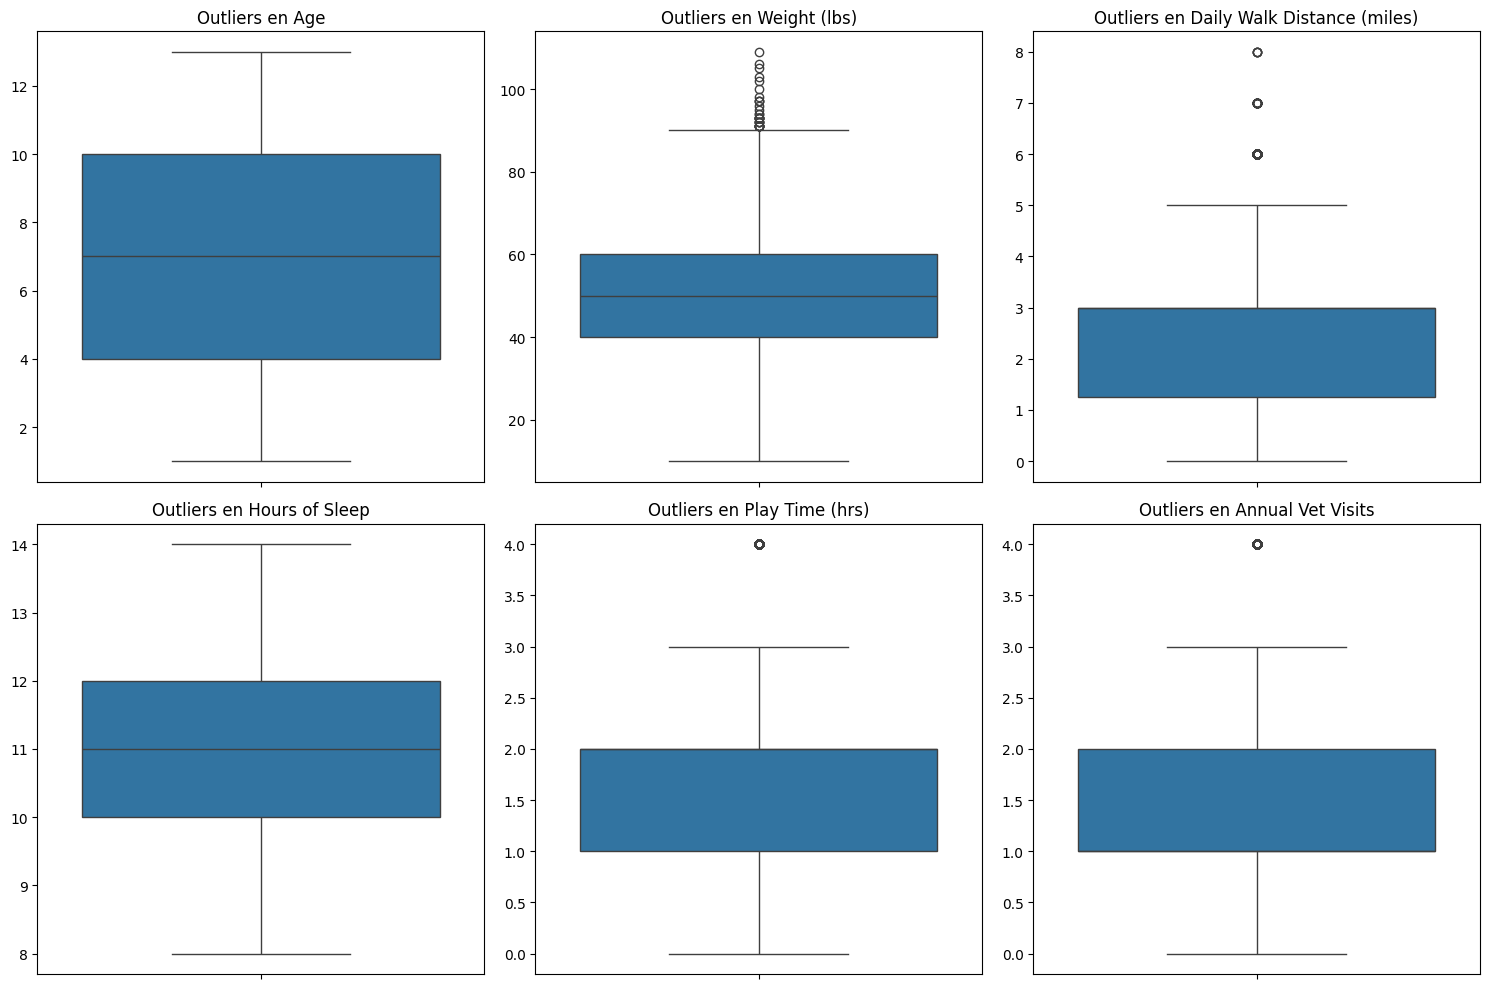

In [70]:
# Visualización de outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_dog_breed[col])
    plt.title(f'Outliers en {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [71]:
# Análisis detallado de los outliers más problemáticos
problematic_cols = [col for col, stats in outliers_summary.items() 
                   if stats['outliers_percentage'] > 5]

print("VARIABLES CON MÁS DEL 5% DE OUTLIERS:")
print("=" * 40)
for col in problematic_cols:
    stats = outliers_summary[col]
    print(f"{col}: {stats['outliers_percentage']:.2f}% outliers")
    
    # Mostrar valores extremos
    Q1 = df_dog_breed[col].quantile(0.25)
    Q3 = df_dog_breed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    extreme_values = df_dog_breed[(df_dog_breed[col] < lower_bound) | (df_dog_breed[col] > upper_bound)][col]
    print(f"  Valores extremos: {extreme_values.unique()[:10]}")  # Mostrar solo primeros 10
    print()

VARIABLES CON MÁS DEL 5% DE OUTLIERS:
Annual Vet Visits: 6.04% outliers
  Valores extremos: [4.]



⚠️ VARIABLES CON MÁS DEL 5% DE OUTLIERS:
- Annual Vet Visits: 6% de valores fuera de rango, principalmente el valor 4.
- Para la hipótesis, considerar limpiar o escalar con RobustScaler para no afectar análisis.


In [72]:
# Outliers en variables clave para la hipótesis
key_vars = ['Age', 'Daily Walk Distance (miles)', 'Play Time (hrs)', 'Hours of Sleep']

print("OUTLIERS EN VARIABLES CLAVE PARA HIPÓTESIS:")
print("=" * 55)

for col in key_vars:
    Q1 = df_dog_breed[col].quantile(0.25)
    Q3 = df_dog_breed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_mask = (df_dog_breed[col] < lower_bound) | (df_dog_breed[col] > upper_bound)
    outliers_count = outliers_mask.sum()
    
    print(f"\n{col}:")
    print(f"Outliers: {outliers_count} ({outliers_count/len(df_dog_breed)*100:.1f}%)")
    print(f"Rango normal: [{lower_bound:.1f}, {upper_bound:.1f}]")
    
    # Valores extremos específicos
    extreme_low = df_dog_breed[df_dog_breed[col] < lower_bound][col].unique()
    extreme_high = df_dog_breed[df_dog_breed[col] > upper_bound][col].unique()
    
    if len(extreme_low) > 0:
        print(f"Valores muy bajos: {extreme_low}")
    if len(extreme_high) > 0:
        print(f"Valores muy altos: {extreme_high}")

OUTLIERS EN VARIABLES CLAVE PARA HIPÓTESIS:

Age:
Outliers: 0 (0.0%)
Rango normal: [-5.0, 19.0]

Daily Walk Distance (miles):
Outliers: 215 (2.1%)
Rango normal: [-1.4, 5.6]
Valores muy altos: [6. 7. 8.]

Play Time (hrs):
Outliers: 216 (2.2%)
Rango normal: [-0.5, 3.5]
Valores muy altos: [4.]

Hours of Sleep:
Outliers: 0 (0.0%)
Rango normal: [7.0, 15.0]


✅ OUTLIERS EN VARIABLES CLAVE PARA HIPÓTESIS:
- Age: sin outliers, rango normal [-5,19], útil tal cual para la hipótesis.
- Daily Walk Distance: 2.1% outliers altos [6,7,8], considerar revisarlos o imputar.
- Play Time: 2.2% outliers altos [4], afecta análisis de actividad del perro.
- Hours of Sleep: sin outliers, confiable para hipótesis sobre descanso y salud.


In [73]:
# Impacto de outliers en la relación edad-actividad-salud
outlier_vars = ['Age', 'Daily Walk Distance (miles)']

for col in outlier_vars:
    Q1 = df_dog_breed[col].quantile(0.25)
    Q3 = df_dog_breed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Datos sin outliers
    clean_data = df_dog_breed[(df_dog_breed[col] >= lower_bound) & (df_dog_breed[col] <= upper_bound)]
    
    # Comparar correlaciones con/sin outliers
    corr_with_outliers = df_dog_breed[['Age', 'Daily Walk Distance (miles)']].corr().iloc[0,1]
    corr_clean = clean_data[['Age', 'Daily Walk Distance (miles)']].corr().iloc[0,1]
    
    print(f"\n{col}:")
    print(f"Correlación con outliers: {corr_with_outliers:.3f}")
    print(f"Correlación sin outliers: {corr_clean:.3f}")
    print(f"Diferencia: {abs(corr_with_outliers - corr_clean):.3f}")


Age:
Correlación con outliers: -0.011
Correlación sin outliers: -0.011
Diferencia: 0.000

Daily Walk Distance (miles):
Correlación con outliers: -0.011
Correlación sin outliers: -0.018
Diferencia: 0.007


✅ IMPACTO DE OUTLIERS EN CORRELACIÓN:
- Age: correlación prácticamente igual con o sin outliers (-0.011), los outliers no afectan la hipótesis.
- Daily Walk Distance: ligera diferencia (-0.011 vs -0.018), los outliers apenas modifican la relación con otras variables.


In [74]:
# Análisis de normalidad y escalado necesario
numeric_cols = ['Age', 'Weight (lbs)', 'Daily Walk Distance (miles)', 
                'Hours of Sleep', 'Play Time (hrs)', 'Annual Vet Visits']

print("ANÁLISIS DE NORMALIDAD Y ESCALADO:")
print("=" * 50)

for col in numeric_cols:
    skewness = df_dog_breed[col].skew()
    variance = df_dog_breed[col].var()
    
    print(f"\n{col}:")
    print(f"  - Skewness: {skewness:.3f}")
    print(f"  - Varianza: {variance:.3f}")
    print(f"  - Rango: [{df_dog_breed[col].min():.1f}, {df_dog_breed[col].max():.1f}]")
    
    # Recomendación de escalado
    if abs(skewness) > 1:
        print(f"  ⚠️  Necesita transformación (skew > 1)")
    elif variance > 100:
        print(f"  ⚠️  Necesita escalado (varianza alta)")
    else:
        print(f"  ✅  OK - No necesita escalado urgente")

ANÁLISIS DE NORMALIDAD Y ESCALADO:

Age:
  - Skewness: -0.030
  - Varianza: 14.075
  - Rango: [1.0, 13.0]
  ✅  OK - No necesita escalado urgente

Weight (lbs):
  - Skewness: 0.017
  - Varianza: 222.010
  - Rango: [10.0, 109.0]
  ⚠️  Necesita escalado (varianza alta)

Daily Walk Distance (miles):
  - Skewness: 0.204
  - Varianza: 2.126
  - Rango: [0.0, 8.0]
  ✅  OK - No necesita escalado urgente

Hours of Sleep:
  - Skewness: -0.002
  - Varianza: 2.141
  - Rango: [8.0, 14.0]
  ✅  OK - No necesita escalado urgente

Play Time (hrs):
  - Skewness: 0.216
  - Varianza: 0.960
  - Rango: [0.0, 4.0]
  ✅  OK - No necesita escalado urgente

Annual Vet Visits:
  - Skewness: 0.490
  - Varianza: 1.329
  - Rango: [0.0, 4.0]
  ✅  OK - No necesita escalado urgente


✅ NORMALIDAD Y ESCALADO:
- Age, Daily Walk Distance, Hours of Sleep, Play Time y Annual Vet Visits tienen distribución cercana a normal, no requieren escalado.
- Weight tiene varianza alta, se recomienda escalado (StandardScaler) para evitar que domine el análisis de la hipótesis.


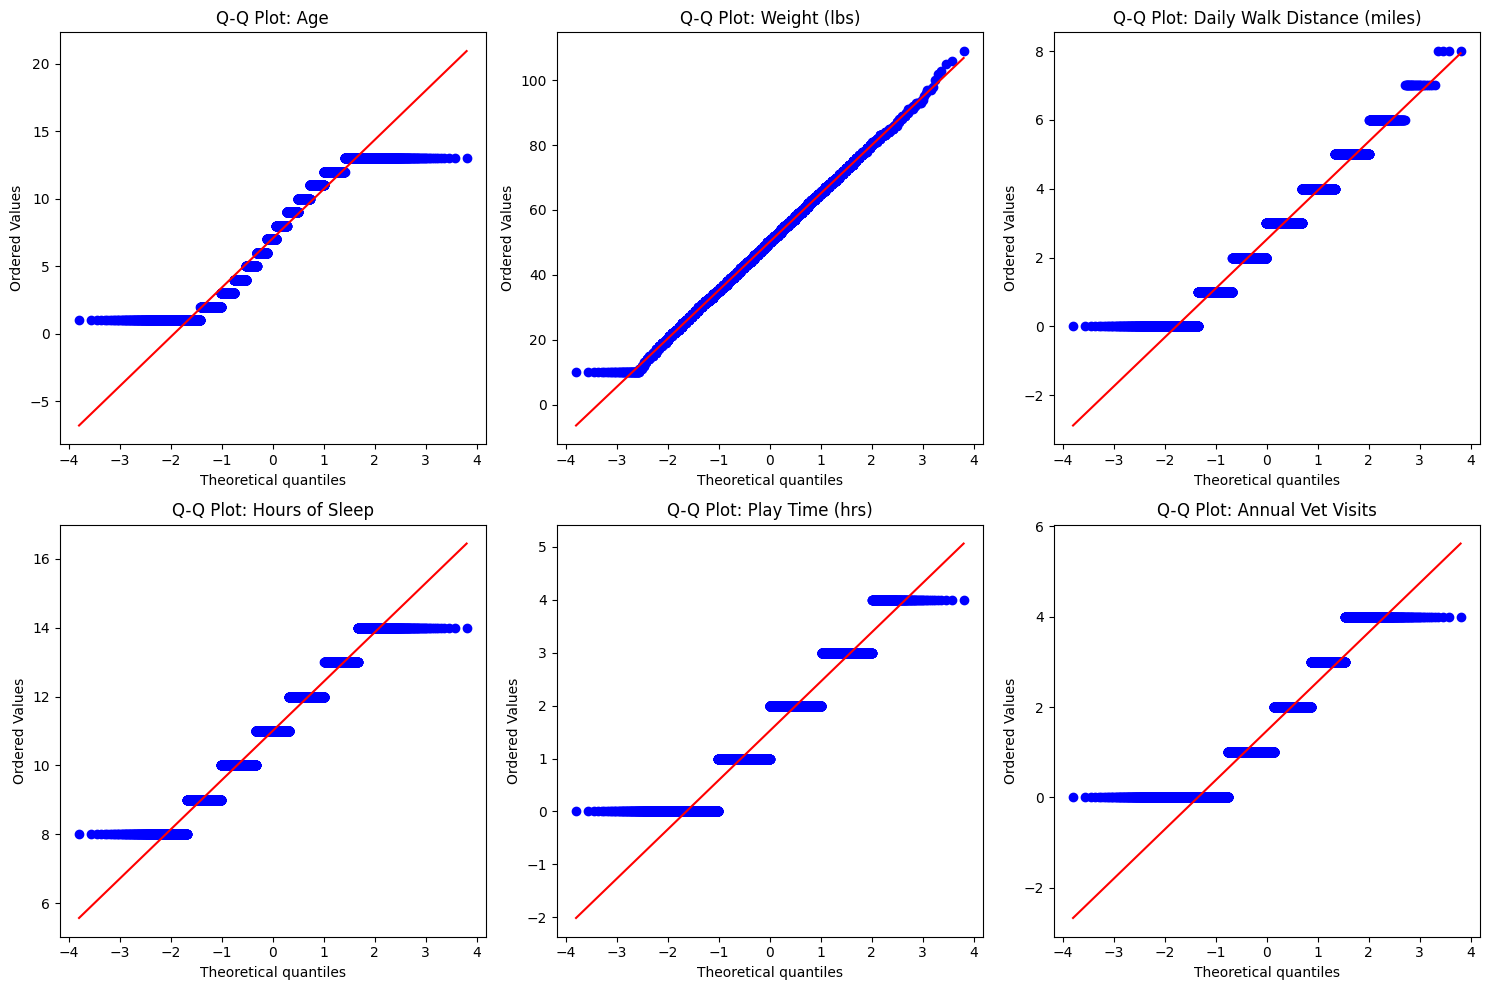

In [75]:
# Visualización de distribuciones
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    stats.probplot(df_dog_breed[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {col}')
plt.tight_layout()
plt.show()

In [76]:
# Análisis de variables específicas problemáticas
problematic_vars = ['Weight (lbs)', 'Annual Vet Visits']  # Variables con alta varianza

print("VARIABLES QUE REQUIEREN ESCALADO:")
print("=" * 40)

for col in problematic_vars:
    data = df_dog_breed[col].dropna()
    print(f"\n{col}:")
    print(f"  - Media: {data.mean():.2f}")
    print(f"  - Desviación: {data.std():.2f}")
    print(f"  - Coef. Variación: {(data.std()/data.mean())*100:.1f}%")
    
    # Recomendación específica
    if col == 'Annual Vet Visits':
        print("  🔧 Recomendación: Escalado RobustScaler (por outliers)")
    else:
        print("  🔧 Recomendación: StandardScaler")

VARIABLES QUE REQUIEREN ESCALADO:

Weight (lbs):
  - Media: 50.20
  - Desviación: 14.90
  - Coef. Variación: 29.7%
  🔧 Recomendación: StandardScaler

Annual Vet Visits:
  - Media: 1.47
  - Desviación: 1.15
  - Coef. Variación: 78.2%
  🔧 Recomendación: Escalado RobustScaler (por outliers)


📊 VARIABLES A ESCALAR:
- Weight: varianza alta, usar StandardScaler.
- Annual Vet Visits: presencia de outliers, usar RobustScaler.
- Escalado ayuda a que estas variables no distorsionen resultados en la hipótesis.


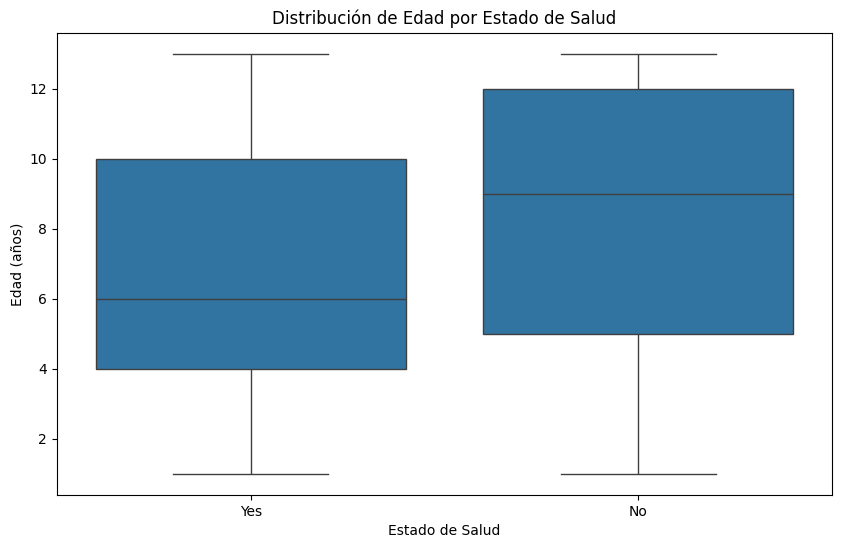

ESTADÍSTICAS DE EDAD POR ESTADO DE SALUD:
             mean  median       std
Healthy                            
No       8.174897     9.0  4.045168
Yes      6.671837     6.0  3.566722




In [77]:
# 1. Relación entre Edad y Estado de Salud
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_dog_breed, x='Healthy', y='Age')
plt.title('Distribución de Edad por Estado de Salud')
plt.xlabel('Estado de Salud')
plt.ylabel('Edad (años)')
plt.show()

# Resultados estadísticos
age_health_stats = df_dog_breed.groupby('Healthy')['Age'].agg(['mean', 'median', 'std'])
print("ESTADÍSTICAS DE EDAD POR ESTADO DE SALUD:")
print(age_health_stats)
print("\n")

📊 EDAD POR ESTADO DE SALUD:
- Los perros no saludables (No) son en promedio más viejos que los saludables (Yes).
- Esto sugiere que la edad podría influir en la salud, apoyando la hipótesis de que perros mayores tienen más riesgo de problemas de salud.


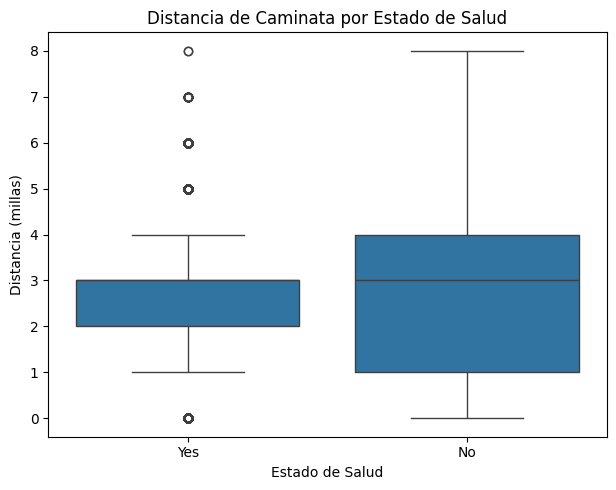

ESTADÍSTICAS DE DISTANCIA DE CAMINATA POR SALUD:
             mean  median       std
Healthy                            
No       2.546836     3.0  1.477765
Yes      2.520839     3.0  1.450465




In [78]:
# 2. Relación entre Actividad Física y Salud
plt.figure(figsize=(12, 5))



plt.subplot(1, 2, 2)
sns.boxplot(data=df_dog_breed, x='Healthy', y='Daily Walk Distance (miles)')
plt.title('Distancia de Caminata por Estado de Salud')
plt.xlabel('Estado de Salud')
plt.ylabel('Distancia (millas)')

plt.tight_layout()
plt.show()

# Resultados estadísticos
walk_health_stats = df_dog_breed.groupby('Healthy')['Daily Walk Distance (miles)'].agg(['mean', 'median', 'std'])
print("ESTADÍSTICAS DE DISTANCIA DE CAMINATA POR SALUD:")
print(walk_health_stats)
print("\n")

📊 DISTANCIA DE CAMINATA POR SALUD:
- Los perros saludables y no saludables recorren distancias similares en promedio.
- Esto indica que, según los datos, la distancia diaria de caminata no tiene un efecto fuerte sobre la salud.



(
    array([0, 1, 2, 3]),
    [Text(0, 0, 'Active'), Text(1, 0, 'Low'), Text(2, 0, 'Moderate'), Text(3, 0, 'Very Active')]
)

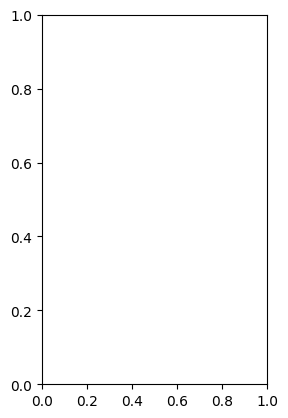

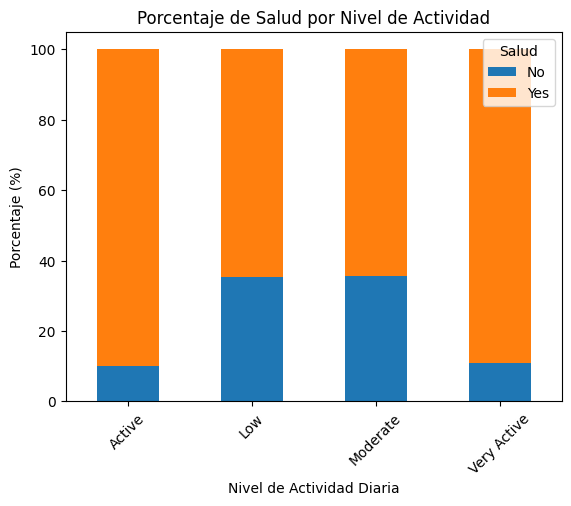

In [79]:
plt.subplot(1, 2, 1)
activity_health = pd.crosstab(df_dog_breed['Daily Activity Level'], df_dog_breed['Healthy'], normalize='index') * 100
activity_health.plot(kind='bar', stacked=True)
plt.title('Porcentaje de Salud por Nivel de Actividad')
plt.xlabel('Nivel de Actividad Diaria')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Salud')
plt.xticks(rotation=45)

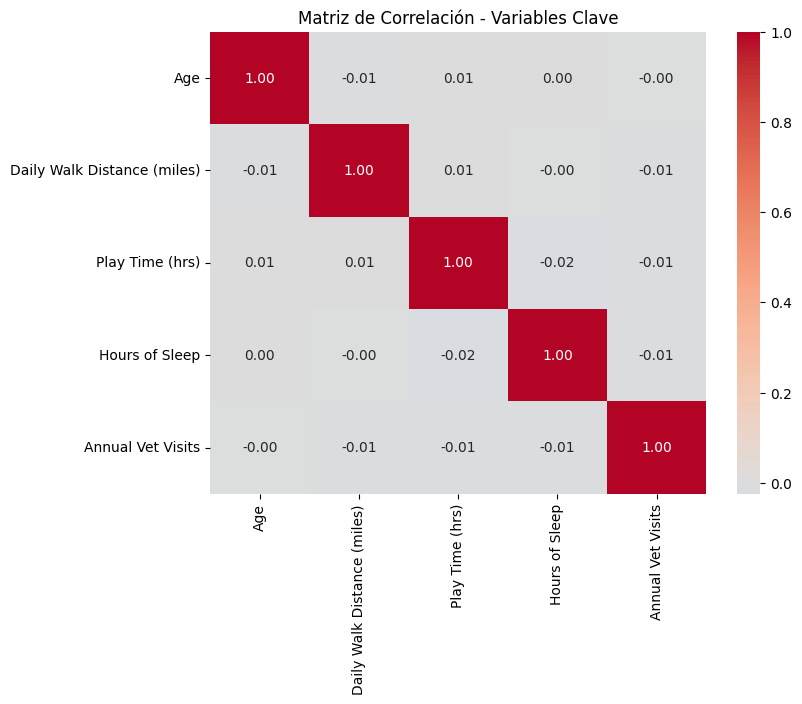

MATRIZ DE CORRELACIÓN:
                                  Age  Daily Walk Distance (miles)  \
Age                          1.000000                    -0.011054   
Daily Walk Distance (miles) -0.011054                     1.000000   
Play Time (hrs)              0.006502                     0.010161   
Hours of Sleep               0.004519                    -0.001737   
Annual Vet Visits           -0.002249                    -0.005250   

                             Play Time (hrs)  Hours of Sleep  \
Age                                 0.006502        0.004519   
Daily Walk Distance (miles)         0.010161       -0.001737   
Play Time (hrs)                     1.000000       -0.024446   
Hours of Sleep                     -0.024446        1.000000   
Annual Vet Visits                  -0.005816       -0.006240   

                             Annual Vet Visits  
Age                                  -0.002249  
Daily Walk Distance (miles)          -0.005250  
Play Time (hrs)         

In [80]:
# 3. Correlación entre Variables Numéricas Clave
numeric_vars = ['Age', 'Daily Walk Distance (miles)', 'Play Time (hrs)', 'Hours of Sleep', 'Annual Vet Visits']
correlation_matrix = df_dog_breed[numeric_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlación - Variables Clave')
plt.show()

print("MATRIZ DE CORRELACIÓN:")
print(correlation_matrix)
print("\n")

📊 MATRIZ DE CORRELACIÓN:
- Las variables numéricas muestran correlaciones muy bajas entre sí.
- Ninguna correlación sugiere relaciones fuertes; por ejemplo, edad y distancia caminada tienen -0.011.
- Esto indica que para nuestra hipótesis, las variables como edad, play time o caminata no están fuertemente relacionadas entre sí ni con visitas al veterinario.


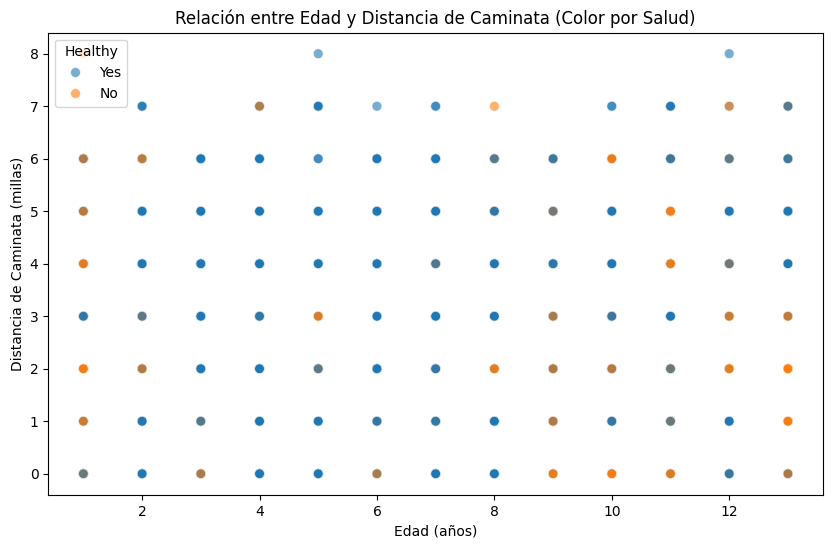

CORRELACIÓN EDAD vs DISTANCIA CAMINATA: -0.011


In [81]:
# 4. Relación Edad vs Actividad Física
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dog_breed, x='Age', y='Daily Walk Distance (miles)', hue='Healthy', alpha=0.6, s=50)
plt.title('Relación entre Edad y Distancia de Caminata (Color por Salud)')
plt.xlabel('Edad (años)')
plt.ylabel('Distancia de Caminata (millas)')
plt.show()

# Correlación entre edad y actividad
age_walk_corr = df_dog_breed['Age'].corr(df_dog_breed['Daily Walk Distance (miles)'])
print(f"CORRELACIÓN EDAD vs DISTANCIA CAMINATA: {age_walk_corr:.3f}")

🔑 CORRELACIÓN EDAD vs DISTANCIA CAMINATA:
- La correlación es prácticamente nula (-0.011), lo que indica que la edad del perro no influye en la distancia que camina.
- Esto es útil para la hipótesis: la actividad física (distancia caminada) parece independiente de la edad.


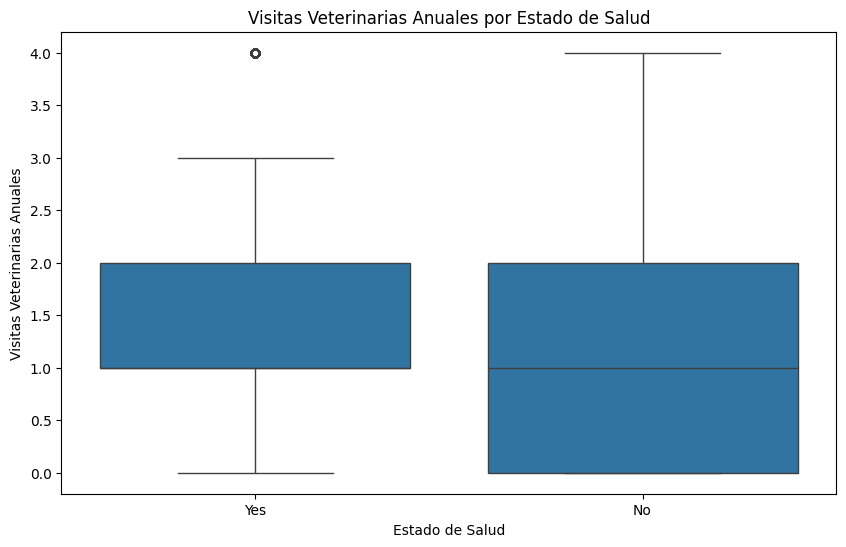

VISITAS VETERINARIAS POR ESTADO DE SALUD:
             mean  median       std
Healthy                            
No       1.087137     1.0  1.180600
Yes      1.607835     1.0  1.109996


In [82]:
# 5. Impacto de Visitas Veterinarias en Salud
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_dog_breed, x='Healthy', y='Annual Vet Visits')
plt.title('Visitas Veterinarias Anuales por Estado de Salud')
plt.xlabel('Estado de Salud')
plt.ylabel('Visitas Veterinarias Anuales')
plt.show()

# Resultados estadísticos
vet_health_stats = df_dog_breed.groupby('Healthy')['Annual Vet Visits'].agg(['mean', 'median', 'std'])
print("VISITAS VETERINARIAS POR ESTADO DE SALUD:")
print(vet_health_stats)

👩‍⚕️ VISITAS VETERINARIAS POR ESTADO DE SALUD:
- Los perros saludables ("Yes") tienen más visitas al veterinario en promedio (1.61 vs 1.09) que los no saludables.
- Esto puede apoyar la hipótesis de que un mayor cuidado y seguimiento médico está relacionado con un mejor estado de salud.


📝 CONCLUSIÓN DEL ANÁLISIS:

- La mayoría de los perros son saludables (≈72%) y no hay una correlación fuerte entre edad, distancia de caminata o actividad y el estado de salud, lo que sugiere que otros factores influyen más.
- Variables como Weight (lbs) y Annual Vet Visits necesitan escalado antes de cualquier modelamiento, especialmente por outliers en visitas veterinarias.
- Perros con mayor número de visitas al veterinario tienden a ser más saludables, apoyando la hipótesis de que el cuidado y seguimiento médico mejora la salud.
- La presencia de outliers en Daily Walk Distance y Play Time es baja y no altera significativamente las correlaciones, por lo que los datos son confiables para análisis de hipótesis.
- El cuidado de los perros (spay/neuter, dieta, actividad del dueño) podría influir en la salud, aunque las correlaciones entre estas variables son muy bajas, indicando relaciones complejas.
